### Stock Market Prediction And Forecasting Using Stacked LSTM

In [64]:
### Keras and Tensorflow >2.0

In [65]:
import pandas as pd

In [66]:
df=pd.read_csv('Sampath_Bank.csv')

In [67]:
df.head()

,Trade Date,Open (Rs.),High (Rs.),Low (Rs.),Close (Rs.),TradeVolume,ShareVolume,Turnover (Rs.)
0,6/24/24,79.7,80.0,79.2,79.7,219,503956,40274883.2
1,6/20/24,79.5,79.7,79.1,79.5,129,115933,9203781.9
2,6/19/24,79.8,79.8,79.0,79.0,188,167967,13299048.0
3,6/18/24,80.1,80.1,79.1,79.7,186,193671,15471438.5
4,6/14/24,80.5,80.5,79.6,80.1,138,199417,15955350.3


In [68]:
df

,Trade Date,Open (Rs.),High (Rs.),Low (Rs.),Close (Rs.),TradeVolume,ShareVolume,Turnover (Rs.)
0,6/24/24,79.7,80.0,79.20,79.7,219,503956,40274883.20
1,6/20/24,79.5,79.7,79.10,79.5,129,115933,9203781.90
2,6/19/24,79.8,79.8,79.00,79.0,188,167967,13299048.00
3,6/18/24,80.1,80.1,79.10,79.7,186,193671,15471438.50
4,6/14/24,80.5,80.5,79.60,80.1,138,199417,15955350.30
...,...,...,...,...,...,...,...,...
7631,9/3/91,NaN,20.0,17.75,20.0,58,40050,781125.00
7632,9/2/91,NaN,19.0,17.50,17.5,29,18700,338625.00
7633,8/29/91,NaN,23.0,22.00,22.0,55,40007,912151.75
7634,8/28/91,NaN,23.0,23.00,23.0,2,600,13800.00


In [69]:
df['Trade Date'] = pd.to_datetime(df['Trade Date'])

# Define the date range for the last 10 years
end_date = df['Trade Date'].max()
start_date = end_date - pd.DateOffset(years=10)

# Filter the DataFrame to include only the last 10 years of data
filtered_df = df[(df['Trade Date'] >= start_date) & (df['Trade Date'] <= end_date)]

# Display the filtered DataFrame
print(filtered_df)

C:\Users\udith\AppData\Local\Temp\ipykernel_13340\4235463591.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Trade Date'] = pd.to_datetime(df['Trade Date'])


     Trade Date  Open (Rs.)  High (Rs.)  Low (Rs.)  Close (Rs.)  TradeVolume  \
0    2024-06-24        79.7        80.0       79.2         79.7          219   
1    2024-06-20        79.5        79.7       79.1         79.5          129   
2    2024-06-19        79.8        79.8       79.0         79.0          188   
3    2024-06-18        80.1        80.1       79.1         79.7          186   
4    2024-06-14        80.5        80.5       79.6         80.1          138   
...         ...         ...         ...        ...          ...          ...   
2357 2014-06-30       196.9       202.0      196.5        200.2          147   
2358 2014-06-27       195.0       196.9      195.0        196.6           35   
2359 2014-06-26       194.0       197.0      194.0        195.6           39   
2360 2014-06-25       193.0       193.6      193.0        193.5           72   
2361 2014-06-24       192.6       193.5      192.6        193.3           47   

      ShareVolume  Turnover (Rs.)  
0  

In [70]:
filtered_df.tail()

,Trade Date,Open (Rs.),High (Rs.),Low (Rs.),Close (Rs.),TradeVolume,ShareVolume,Turnover (Rs.)
2357,2014-06-30,196.9,202.0,196.5,200.2,147,186569,37220898.0
2358,2014-06-27,195.0,196.9,195.0,196.6,35,16356,3204298.5
2359,2014-06-26,194.0,197.0,194.0,195.6,39,23986,4681481.8
2360,2014-06-25,193.0,193.6,193.0,193.5,72,110628,21386372.7
2361,2014-06-24,192.6,193.5,192.6,193.3,47,51461,9935983.1


In [71]:
df1=filtered_df.reset_index()['Close (Rs.)']

In [72]:
df1

0        79.7
1        79.5
2        79.0
3        79.7
4        80.1
        ...  
2357    200.2
2358    196.6
2359    195.6
2360    193.5
2361    193.3
Name: Close (Rs.), Length: 2362, dtype: float64

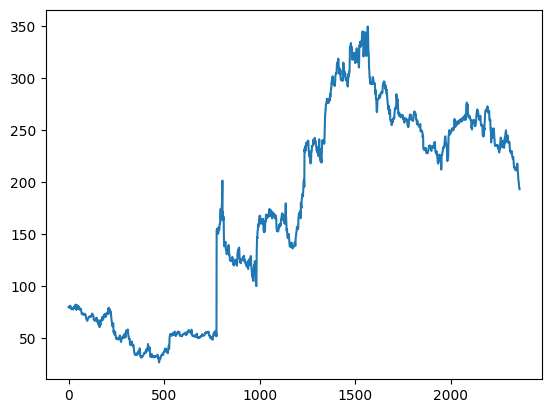

In [73]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [74]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [75]:
import numpy as np

In [76]:
df1

0        79.7
1        79.5
2        79.0
3        79.7
4        80.1
        ...  
2357    200.2
2358    196.6
2359    195.6
2360    193.5
2361    193.3
Name: Close (Rs.), Length: 2362, dtype: float64

In [77]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [78]:
print(df1)

[[0.16496756]
 [0.16434971]
 [0.16280507]
 ...
 [0.52301514]
 [0.51652765]
 [0.51590979]]


In [79]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [80]:
training_size,test_size

(1535, 827)

In [81]:
train_data

array([[0.16496756],
       [0.16434971],
       [0.16280507],
       ...,
       [0.95057152],
       [0.9459376 ],
       [0.95335187]])

In [82]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [83]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [84]:
print(X_train.shape), print(y_train.shape)

(1434, 100)
(1434,)


(None, None)

In [85]:
print(X_test.shape), print(ytest.shape)

(726, 100)
(726,)


(None, None)

In [86]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [87]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from keras.layers import GRU

In [101]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam


model=Sequential()
model.add(GRU(50,return_sequences=True,input_shape=(100,1)))
model.add(GRU(50,return_sequences=True))
model.add(GRU(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')




# Summary of the model
model.summary()


C:\Users\udith\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_4 (GRU)                          │ (None, 100, 50)             │           7,950 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_5 (GRU)                          │ (None, 100, 50)             │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_6 (GRU)                          │ (None, 50)                  │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,601 (150.79 KB)

 Trainable params: 38,601 (150.79 KB)

 Non-trainable params: 0 (0.00 B)

In [102]:
from tensorflow.keras.callbacks import EarlyStopping

# Define EarlyStopping callback
early_stop = EarlyStopping(
    monitor='val_loss',  # Monitor the validation loss
    patience=5,          # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore model weights from the epoch with the best validation loss
)

# Train the model with EarlyStopping
history = model.fit(
    X_train, y_train, 
    validation_data=(X_test,ytest),  # Use validation data for early stopping
    epochs=100, 
    batch_size=32, 
    callbacks=[early_stop],  # Add EarlyStopping to the training process
    verbose=1
)


Epoch 1/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 7s 74ms/step - loss: 0.0318 - val_loss: 7.5897e-04
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 4.6793e-04 - val_loss: 4.2113e-04
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 4.6124e-04 - val_loss: 3.9423e-04
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 3.5138e-04 - val_loss: 2.6079e-04
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - loss: 4.0071e-04 - val_loss: 1.6150e-04
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - loss: 3.2918e-04 - val_loss: 1.3697e-04
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 2.9010e-04 - val_loss: 1.3799e-04
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 2.7847e-04 - val_loss: 1.2916e-04
Epoch 9/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 2.5554e-04 - val_loss: 9.4301e-05
Epoch 10/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 3.4834e-04 - val_loss: 8.9640e-05
Epoch 11/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 2.

In [103]:
import tensorflow as tf

In [104]:
tf.__version__

'2.16.1'

In [105]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [106]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [107]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

157.55960476606612

In [108]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

250.61496504185826

In [109]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_train, train_predict)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_train, train_predict)

# Calculate Root Mean Squared Error (RMSE)
rmse = math.sqrt(mse)

# Print all the metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 129.68020376760825
Mean Squared Error (MSE): 24825.029054038965
Root Mean Squared Error (RMSE): 157.55960476606612


In [110]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(ytest, test_predict)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(ytest, test_predict)

# Calculate Root Mean Squared Error (RMSE)
rmse = math.sqrt(mse)

# Print all the metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 249.9383079774962
Mean Squared Error (MSE): 62807.86070293184
Root Mean Squared Error (RMSE): 250.61496504185826


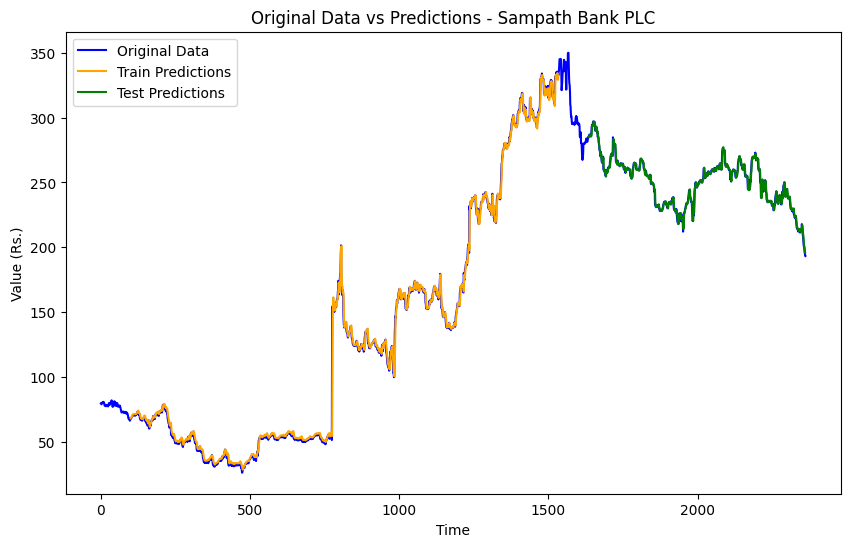

In [111]:
# shift train predictions for plotting
look_back = 100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2) + 1:len(df1) - 1, :] = test_predict

# plot baseline and predictions
plt.figure(figsize=(10, 6))
plt.plot(scaler.inverse_transform(df1), label='Original Data', color='blue')
plt.plot(trainPredictPlot, label='Train Predictions', color='orange')
plt.plot(testPredictPlot, label='Test Predictions', color='green')

# Add title and labels
plt.title('Original Data vs Predictions - Sampath Bank PLC')
plt.xlabel('Time')
plt.ylabel('Value (Rs.)')

# Add a legend
plt.legend(loc='upper left')

# Show the plot
plt.show()

In [99]:
len(test_data)

827

In [37]:
a = len(test_data) - 100

In [38]:
x_input=test_data[a:].reshape(1,-1)
x_input.shape


(1, 100)

In [39]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [40]:
temp_input

[0.664504170528267,
 0.6694470188446091,
 0.6601791782514674,
 0.6601791782514674,
 0.6468952734012974,
 0.642570281124498,
 0.6416434970651839,
 0.6407167130058695,
 0.6407167130058695,
 0.6524559777571826,
 0.6552363299351252,
 0.659870250231696,
 0.659870250231696,
 0.651220265678097,
 0.6509113376583255,
 0.6595613222119248,
 0.6533827618164969,
 0.6447327772628977,
 0.6385542168674698,
 0.6468952734012974,
 0.6478220574606117,
 0.6573988260735248,
 0.6694470188446091,
 0.6536916898362681,
 0.6564720420142107,
 0.6814952116156936,
 0.6848934198331789,
 0.6861291319122644,
 0.6910719802286067,
 0.6827309236947792,
 0.6675934507259809,
 0.6657398826073526,
 0.6570898980537534,
 0.6694470188446091,
 0.6722273710225517,
 0.6694470188446091,
 0.6743898671609514,
 0.6756255792400372,
 0.6654309545875812,
 0.6577077540932963,
 0.6540006178560396,
 0.6530738337967252,
 0.6540006178560396,
 0.6546184738955823,
 0.6570898980537534,
 0.6564720420142107,
 0.6567809700339822,
 0.645659561322212

In [41]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.47876164]
101
1 day input [0.66944702 0.66017918 0.66017918 0.64689527 0.64257028 0.6416435
 0.64071671 0.64071671 0.65245598 0.65523633 0.65987025 0.65987025
 0.65122027 0.65091134 0.65956132 0.65338276 0.64473278 0.63855422
 0.64689527 0.64782206 0.65739883 0.66944702 0.65369169 0.65647204
 0.68149521 0.68489342 0.68612913 0.69107198 0.68273092 0.66759345
 0.66573988 0.6570899  0.66944702 0.67222737 0.66944702 0.67438987
 0.67562558 0.66543095 0.65770775 0.65400062 0.65307383 0.65400062
 0.65461847 0.6570899  0.65647204 0.65678097 0.64565956 0.6373185
 0.63206673 0.62743281 0.62928638 0.62866852 0.62928638 0.62310782
 0.62835959 0.6218721  0.6261971  0.62743281 0.62866852 0.61569354
 0.61383998 0.61322212 0.60704356 0.6085882  0.60951498 0.61167748
 0.60426321 0.59499537 0.58943466 0.58294717 0.5832561  0.58263825
 0.57800432 0.57985789 0.57398826 0.57707754 0.57676861 0.57985789
 0.57862218 0.57676861 0.57151684 0.57398826 0.57615076 0.57985789
 0.57707754 0.58047575 0.59190609 0

In [42]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [43]:
import matplotlib.pyplot as plt

In [44]:
len(df1)

2362

In [45]:
b = len(df1) - 100

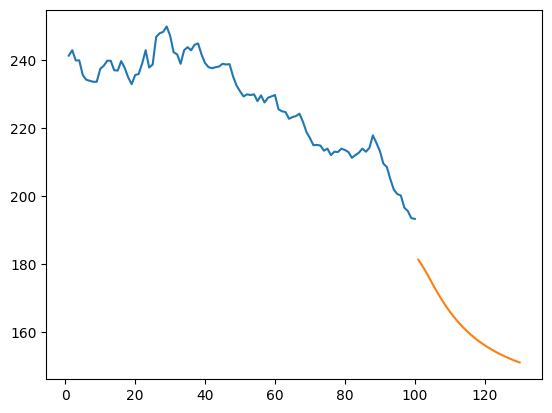

In [46]:
plt.plot(day_new,scaler.inverse_transform(df1[b:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [47]:
c = len(df1) - 500

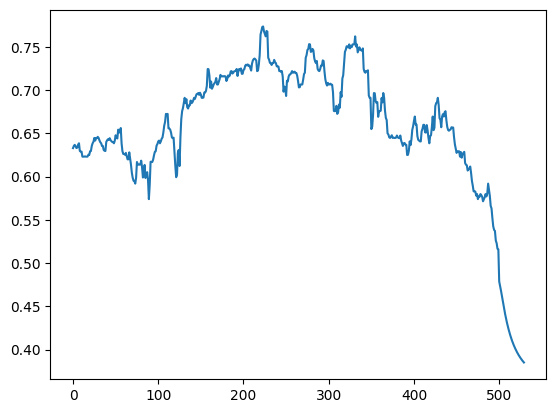

In [48]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[c:])

In [49]:
df3=scaler.inverse_transform(df3).tolist()

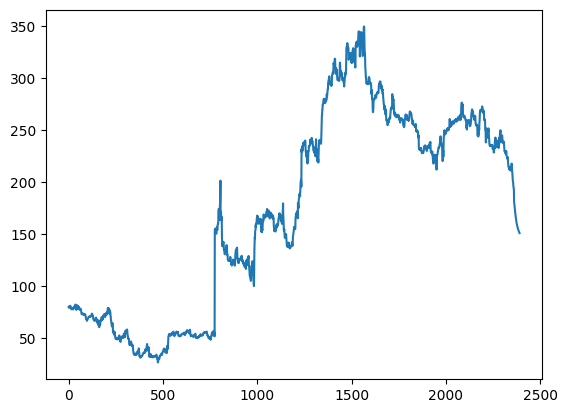

In [50]:
plt.plot(df3)